In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
# Load dataset
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
#1. EDA (Summary Statistics)
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
# Checking missing values
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [9]:
df.isna()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [11]:
 #Check for missing values
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [13]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

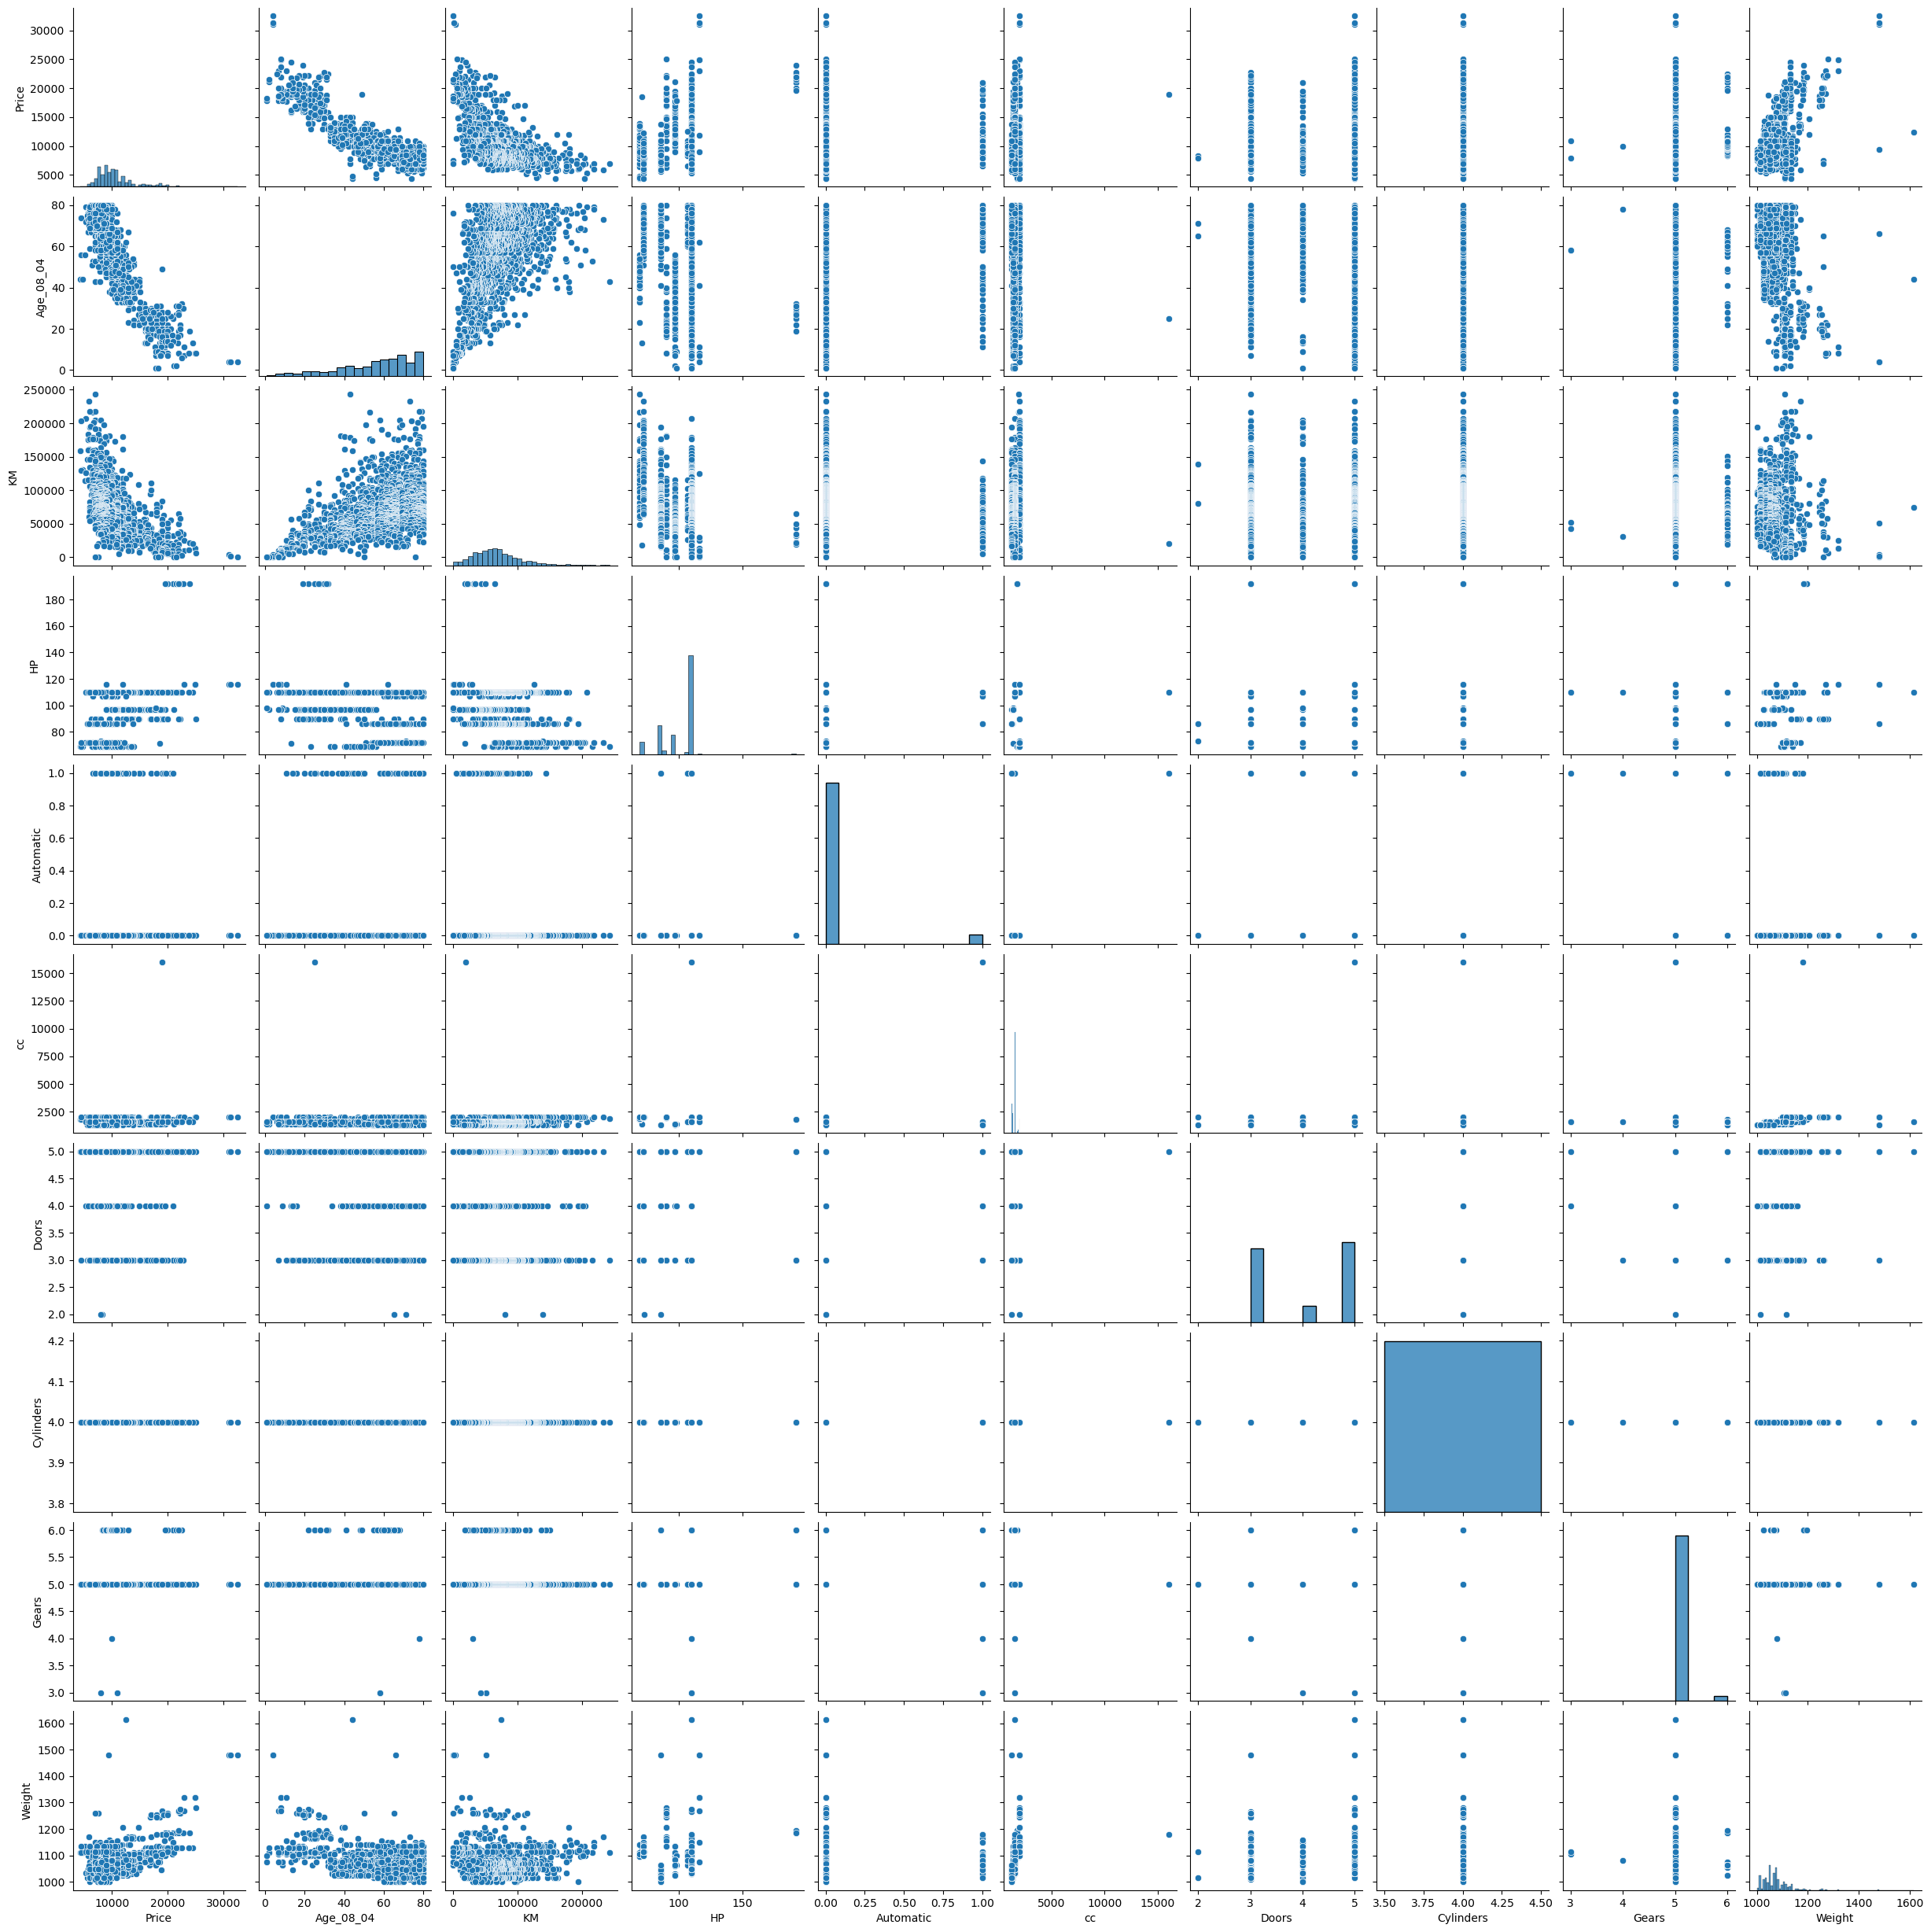

In [17]:
#Pairplot for visiual relationship
sns.pairplot(df)

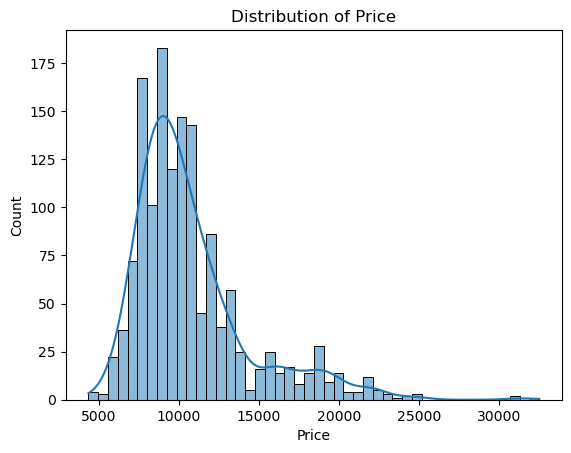

In [30]:
# Visualizing distribution of Price
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

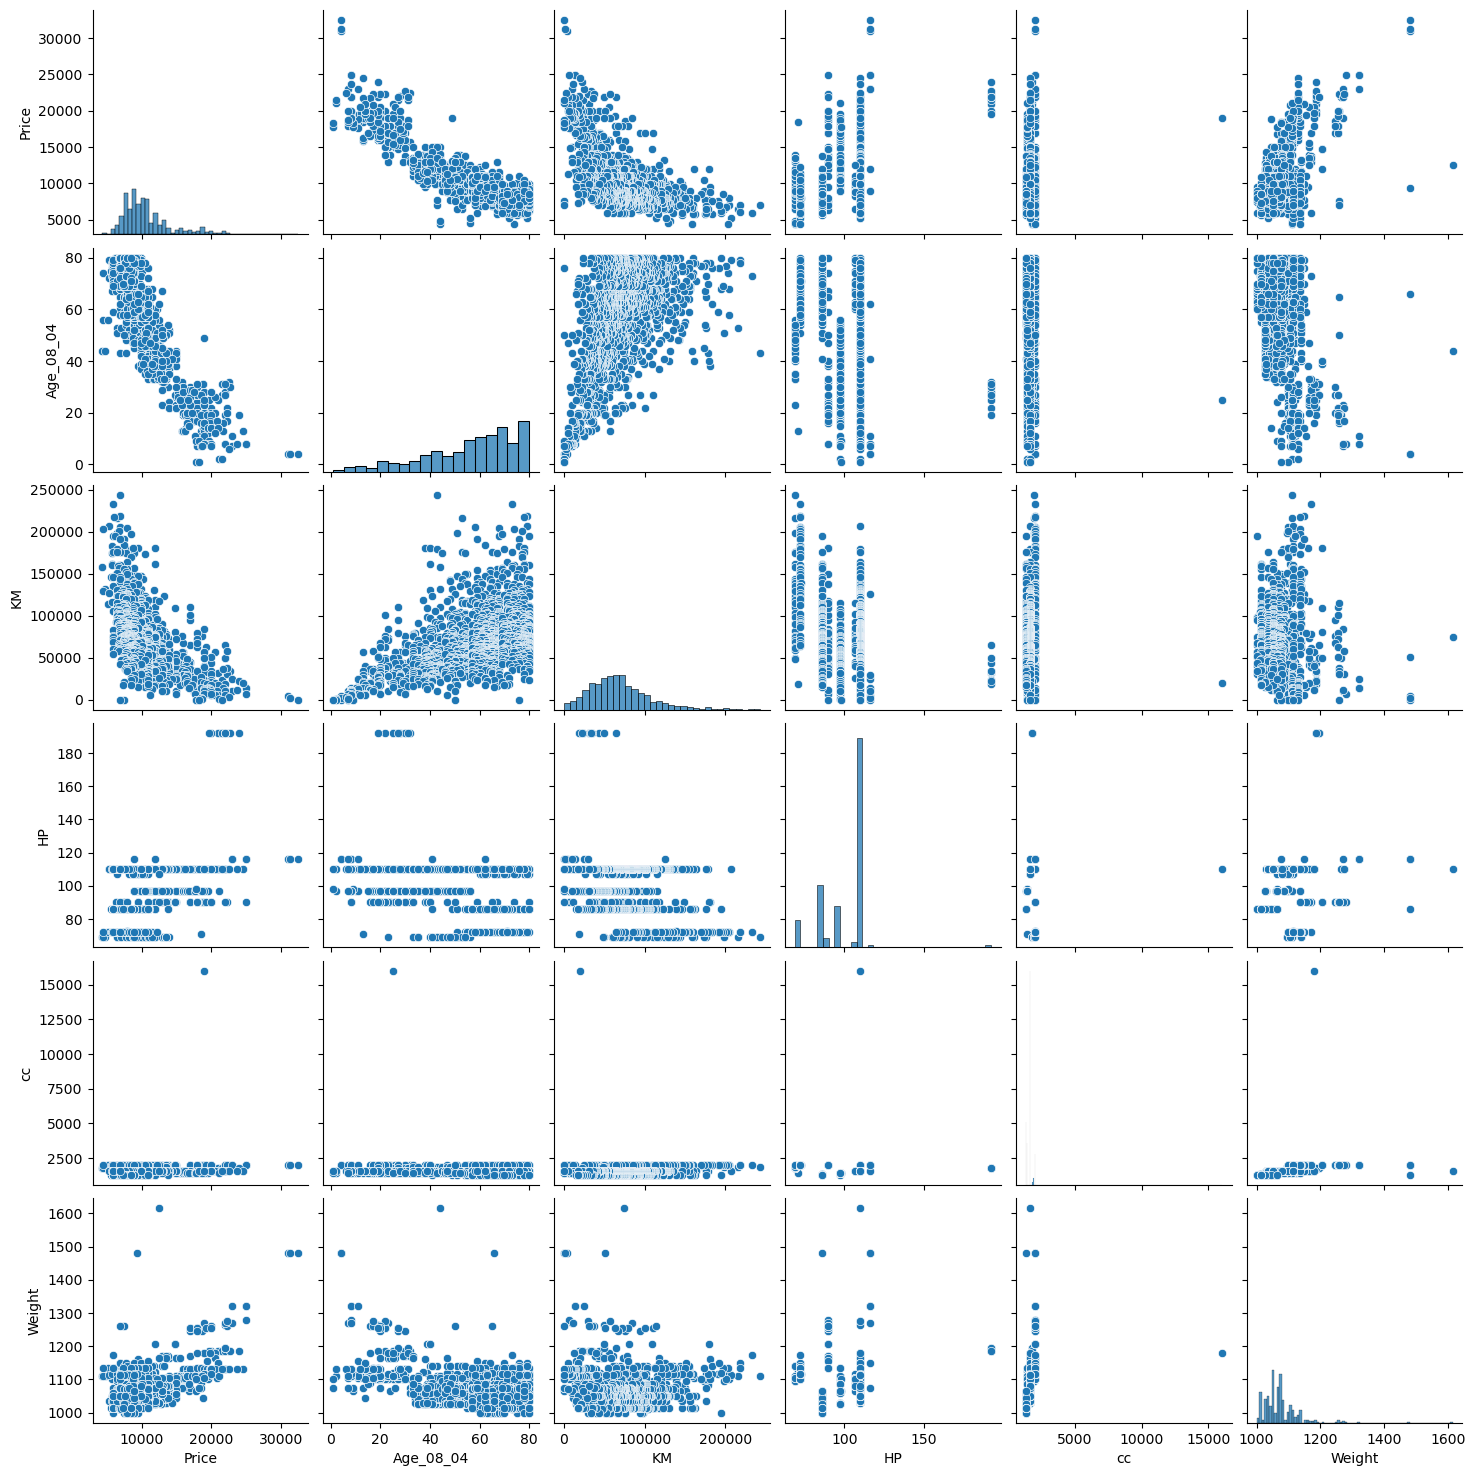

In [32]:
# Scatter plots for numerical variables vs Price
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

In [33]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [36]:
# Split data into features and target variable
X = df.drop(columns='Price')
y = df['Price']

In [38]:
# Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Model 1: All features
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_1 = model_1.predict(X_test_scaled)

# Evaluate model
print(f'Model 1 R^2: {r2_score(y_test, y_pred_1)}')
print(f'Model 1 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_1))}')

Model 1 R^2: 0.8348888040611082
Model 1 RMSE: 1484.265415329652


In [44]:
# Model 2: Select important features based on correlation
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

model_2 = LinearRegression()
model_2.fit(X_train_selected_scaled, y_train)

# Predict on test data
y_pred_2 = model_2.predict(X_test_selected_scaled)

# Evaluate model
print(f'Model 2 R^2: {r2_score(y_test, y_pred_2)}')
print(f'Model 2 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_2))}')


Model 2 R^2: 0.8506068681500834
Model 2 RMSE: 1411.8502091131115


In [46]:
# Adding interaction terms
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_3 = LinearRegression()
model_3.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_3 = model_3.predict(X_test_scaled)

# Evaluate model
print(f'Model 3 R^2: {r2_score(y_test, y_pred_3)}')
print(f'Model 3 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_3))}')


Model 3 R^2: 0.8621657410005827
Model 3 RMSE: 1356.1317831454749


In [48]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # Tune alpha
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f'Lasso R^2: {r2_score(y_test, y_pred_lasso)}')
print(f'Lasso RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')

Lasso R^2: 0.8621080889754195
Lasso RMSE: 1356.4153685562142


In [50]:
# Ridge Regression
ridge = Ridge(alpha=0.1)  # Tune alpha
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print(f'Ridge R^2: {r2_score(y_test, y_pred_ridge)}')
print(f'Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')


Ridge R^2: 0.8620895666294804
Ridge RMSE: 1356.5064658180754


In [ ]:
                    #Interview Questions

In [ ]:
#1. What is Normalization & Standardization and how is it helpful?
#Ans:- Normalization scales data to a fixed range, usually [0, 1], while Standardization transforms data to have a mean of 0 and a standard deviation of 1.
        # They are helpful in following ways
        #1. Normalization is useful when algorithms (e.g., KNN, neural networks) need features on the same scale to ensure equal contribution to predictions.
        #2.Standardization is ideal when data follows a Gaussian distribution or when algorithms (e.g., SVM, logistic regression) assume normally distributed features for optimal performance.
        #3.Both improve model performance by ensuring that features are comparable

In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
#Ans:- #1. Remove one of the correlated variables
        #2.Use Ridge or Lasso regression
        #3.Principal Component Analysis (PCA)
        #4.Variance Inflation Factor (VIF)
#These techniques help improve model stability and performance.